In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, random_state=11) # code comes here
data2, label2 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=5, random_state=11) # code comes here

Let's split the datasets into train and test.

In [0]:
(train_x_data1, test_x_data1, train_y_data1, test_y_data1) = train_test_split( data1, label1, train_size=0.8, random_state=11)      # code comes here
(train_x_data2, test_x_data2, train_y_data2, test_y_data2) = train_test_split( data2, label2, train_size=0.8, random_state=11)      # code comes here


Plot the first dataset with standard deviation 1.

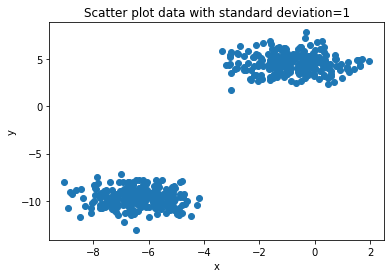

In [0]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 5.

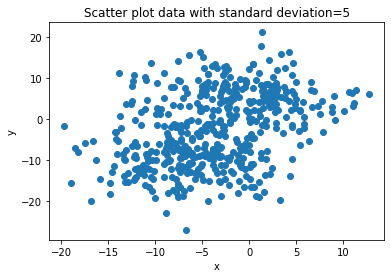

In [0]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [0]:
GNB = GaussianNB()   # code comes here
GNB.fit(train_x_data1, train_y_data1)   # code comes here

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
CLF = LogisticRegression(random_state=0)    # code comes here
CLF.fit(train_x_data1, train_y_data1)         # code comes here

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(test_x_data1), test_y_data1))            # code comes here

# Extra
print("Confusion Matrix for Naive Bayesian")
print(confusion_matrix((GNB.predict(test_x_data1)), test_y_data1))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Naive Bayesian
[[53  0]
 [ 0 47]]


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(CLF.predict(test_x_data1,),test_y_data1))             # code comes here

# Extra
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix((CLF.predict(test_x_data1)), test_y_data1))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Logistic Regression
[[53  0]
 [ 0 47]]


### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [0]:
GNB = GaussianNB()   # code comes here
GNB.fit(train_x_data2, train_y_data2)   # code comes here

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
CLF = LogisticRegression(random_state=5)    # code comes here
CLF.fit(train_x_data2, train_y_data2)       # code comes here

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(test_x_data2), test_y_data2))   # code comes here

# Extra
print("Confusion Matrix for Naive Bayesian")
print(confusion_matrix((GNB.predict(test_x_data2)), test_y_data2))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        57
           1       0.89      0.98      0.93        43

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix for Naive Bayesian
[[52  5]
 [ 1 42]]


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(CLF.predict(test_x_data2,),test_y_data2))    # code comes here

# Extra
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix((CLF.predict(test_x_data2)), test_y_data2))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.91      0.96      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix for Logistic Regression
[[51  4]
 [ 2 43]]


### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')
#C:\Users\Penguin\Google Drive (Sabanci)\2019-2020 302\CS412\HW 3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_json("/content/drive/My Drive/2019-2020 302/CS412/HW 3/News_Category_Dataset_v2.json",lines=True)        # code comes here
print("JSON Done!")

JSON Done!


## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [0]:
new_df['category'].value_counts()

POLITICS         8146
WELLNESS         4436
ENTERTAINMENT    3995
TRAVEL           2441
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words="english")  # code comes here
x_train_counts = count_vect.fit_transform(X)                        # code comes here

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()                              # code comes here
x_train_tf = tfidf_transformer.fit_transform(x_train_counts)        # code comes here

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
(train_data, test_data, train_label, test_label) = train_test_split( x_train_tf, y, train_size=0.8)      # code comes here

### Gaussian Naive Bayesian

In [0]:
GNB = GaussianNB()  # code comes here
GNB.fit(train_data.toarray(),train_label)     # code comes here

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(test_data.toarray()),test_label))             # code comes here

# Extra
print("Confusion Matrix for Naive Bayesian")
print(confusion_matrix((GNB.predict(test_data.toarray())), test_label))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1576
           1       0.69      0.69      0.69       881
           2       0.68      0.68      0.68       822
           3       0.61      0.57      0.59       525

    accuracy                           0.71      3804
   macro avg       0.69      0.68      0.68      3804
weighted avg       0.71      0.71      0.71      3804

Confusion Matrix for Naive Bayesian
[[1221  141  129   85]
 [ 134  608   64   75]
 [ 173   58  561   30]
 [  81   78   67  299]]


### 6) Logistic Regression

In [0]:
clf = LogisticRegression(random_state=0,max_iter=1000)    # code comes here
clf.fit(train_data.toarray(),train_label)   # code comes here

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(test_data.toarray()),test_label))              # code comes here

# Extra
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix((clf.predict(test_data.toarray())), test_label))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1747
           1       0.91      0.89      0.90       900
           2       0.82      0.89      0.85       759
           3       0.74      0.91      0.82       398

    accuracy                           0.89      3804
   macro avg       0.86      0.89      0.87      3804
weighted avg       0.90      0.89      0.89      3804

Confusion Matrix for Logistic Regression
[[1539   45  114   49]
 [  33  803   22   42]
 [  29   24  672   34]
 [   8   13   13  364]]


### Observe Logistic Regression is much slower but more accurate. Discuss.

# REPORT

We tested a real-life dataset taken from HuffPost on 4 different topics of news such as politics, wellness, entertainment, travel. We use 2 different classifiers and compare them based on their performances. Since we are using real life data and not an artificial data created by Gaussian distribution, Logistic Regression’s accuracy was way over the Gaussian Naïve Bayesian approach. This is what we expected because real life data are not conditionally independent, so Naïve Bayesian approach is not very helpful in our case.
	We obtained the best results with the Linear Regression, which gives the accuracy of 89% on test data. Naïve Bayesian approach had 71% accuracy on test data. However, these results were based on accuracy of the classifiers. When we compare the time complexities of the classifiers, Logistic Regression took such a long time that we get an “iteration limit reached” error. We can solve this by letting it do more iterations if we want. We had a pretty big dataset yet; Naïve Bayesian approach was instant. In the end, Logistic Regression is undoubtedly giving the best results with a difference of nearly 20%. However, it took a really long time to do that.
